In [3]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
data = pd.read_csv('healthcare_dataset.csv.zip')

Data Analysis

In [5]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [6]:
data.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal
55499,jAMES GARCiA,53,Female,O+,Arthritis,2024-04-02,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,2024-04-29,Ibuprofen,Abnormal


In [7]:
data.shape

(55500, 15)

In [8]:
data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [10]:
data.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [11]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
55495,False
55496,False
55497,False
55498,False


In [12]:
data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [16]:
data['Test Results'].unique()

array([2, 1, 0])

Data Preprocessing

In [14]:
#Initialize the LabelEncoder
le = LabelEncoder()

#Encode the target variable
data['Test Results'] = le.fit_transform(data['Test Results'])

In [15]:
#Apply LabelEncoder on the categorical column

data['Gender'] = le.fit_transform(data['Gender'])
data['Blood Type'] = le.fit_transform(data['Blood Type'])
data['Medical Condition'] = le.fit_transform(data['Medical Condition'])
data['Insurance Provider'] = le.fit_transform(data['Insurance Provider'])
data['Admission Type'] = le.fit_transform(data['Admission Type'])
data['Medication'] = le.fit_transform(data['Medication'])
data['Test Results'] = le.fit_transform(data['Test Results'])

Spilting the data

In [17]:
X = data[['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication']]
y = data['Test Results']

In [18]:
#Spliting data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Building the model

In [19]:
#Create the Neural Network Model

model = Sequential([Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
Dense(8, activation='relu'),
Dense(3, activation='softmax')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
#Compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
#train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3329 - loss: 1.9931 - val_accuracy: 0.3304 - val_loss: 1.1055
Epoch 2/100
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3339 - loss: 1.1025 - val_accuracy: 0.3360 - val_loss: 1.1002
Epoch 3/100
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3327 - loss: 1.1022 - val_accuracy: 0.3418 - val_loss: 1.1010
Epoch 4/100
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3340 - loss: 1.1014 - val_accuracy: 0.3259 - val_loss: 1.0993
Epoch 5/100
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3317 - loss: 1.1009 - val_accuracy: 0.3312 - val_loss: 1.1015
Epoch 6/100
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3379 - loss: 1.1002 - val_accuracy: 0.3279 - val_loss: 1.1045
Epoch 7/100
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3376 - loss: 1.1004 - val_accuracy: 0.3284 - val_loss: 1.1010
Epoch 8/100
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3351 - loss: 1

7. Evaluating the model/


In [22]:
#Make Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [23]:
#evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

Accuracy: 0.34135135135135136


8 - Data Visualisation

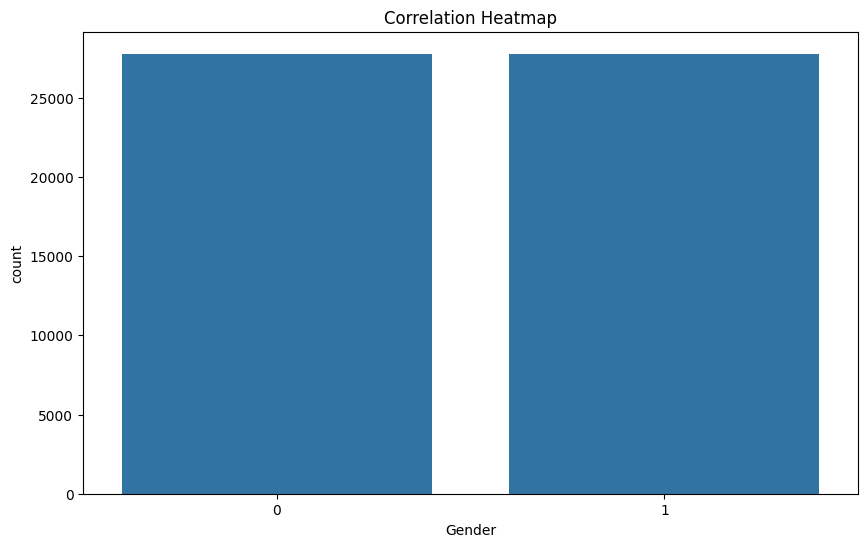

In [28]:
df = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender',data=df)
plt.title('Correlation Heatmap')
plt.show()


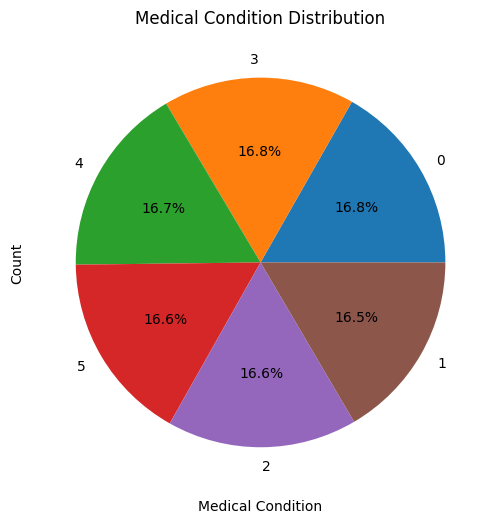

In [32]:
plt.figure(figsize=(10, 6))
df['Medical Condition'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Medical Condition Distribution')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.show()

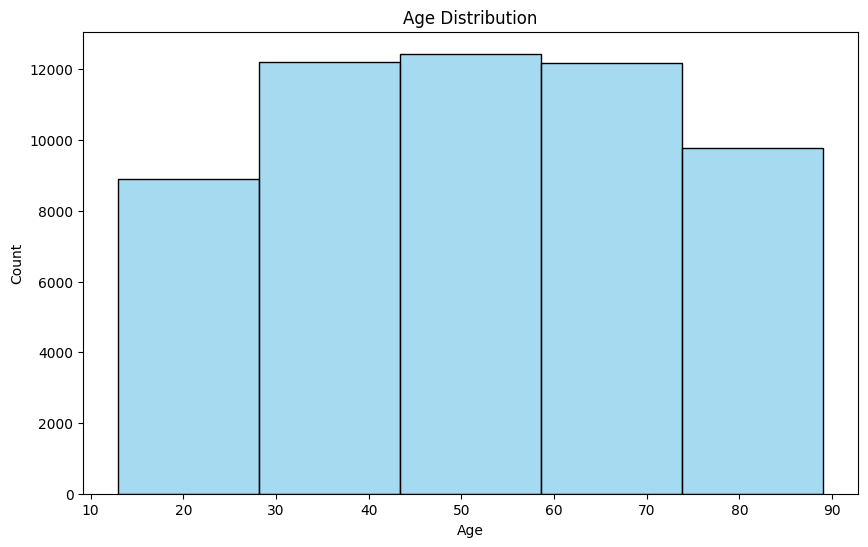

In [34]:
# 3. Histogram of Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=5,color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

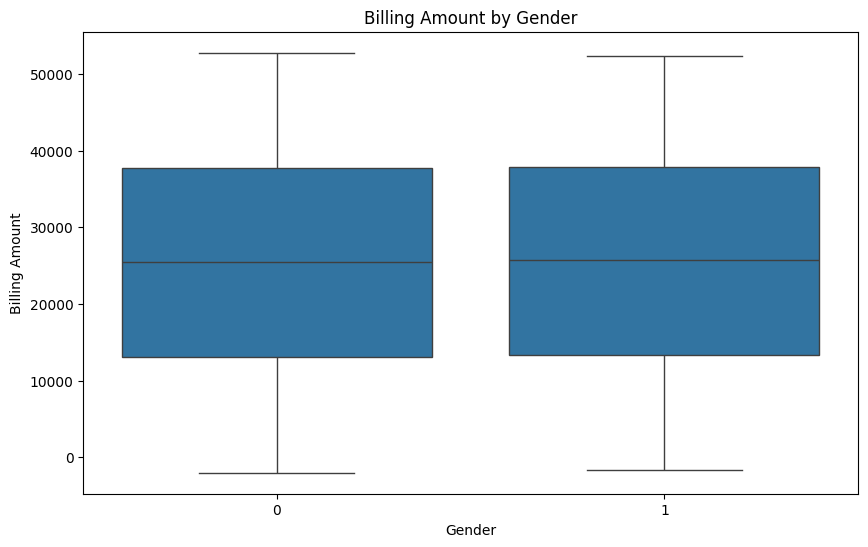

In [35]:
#4 Box plot of billing Amount by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Billing Amount', data=df)
plt.title('Billing Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Billing Amount')
plt.show()

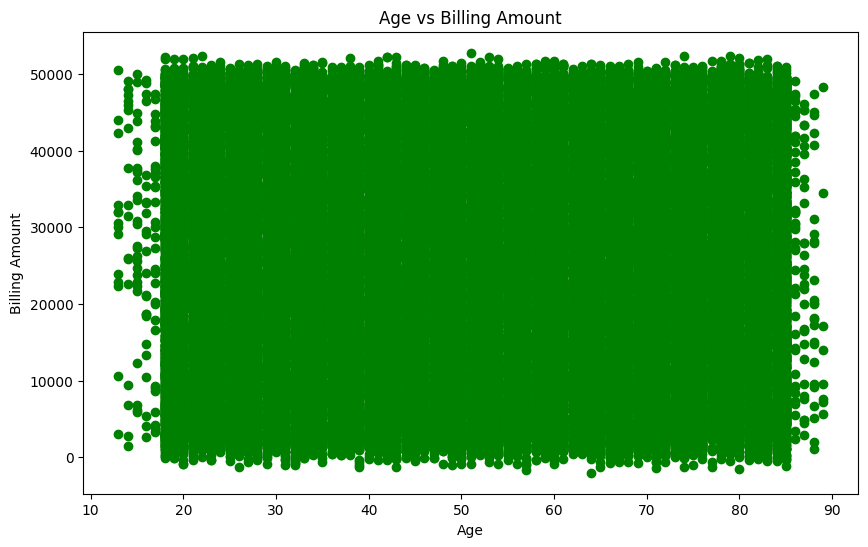

In [36]:
#5. Scatter plot of Age vs Billing Amount
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Billing Amount'], color='green')
plt.title('Age vs Billing Amount')
plt.xlabel('Age')
plt.ylabel('Billing Amount')
plt.show()

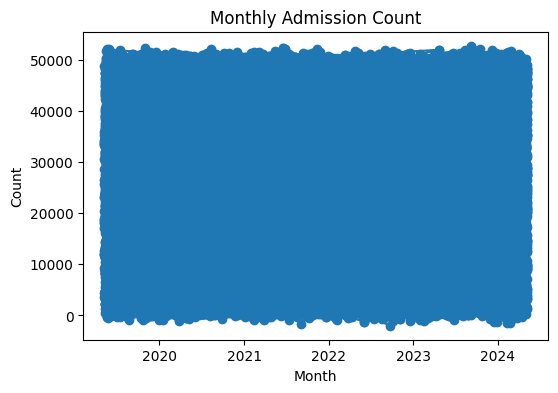

In [39]:
#Convert 'Date of Admission' to datetime
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

plt.figure(figsize=(6,4))
plt.plot(df['Date of Admission'], df['Billing Amount'],marker='o')
plt.title('Monthly Admission Count')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

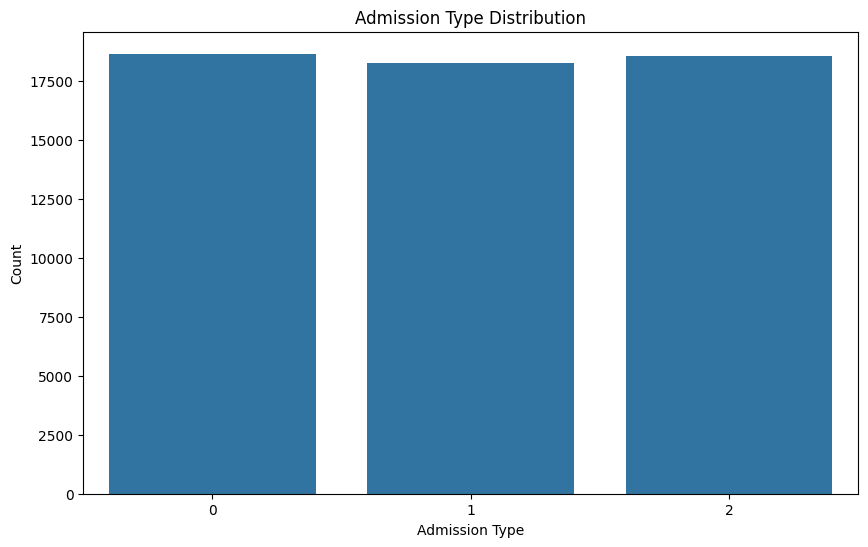

In [40]:
#7. Countplot of Admission Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Admission Type', data=df)
plt.title('Admission Type Distribution')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.show()

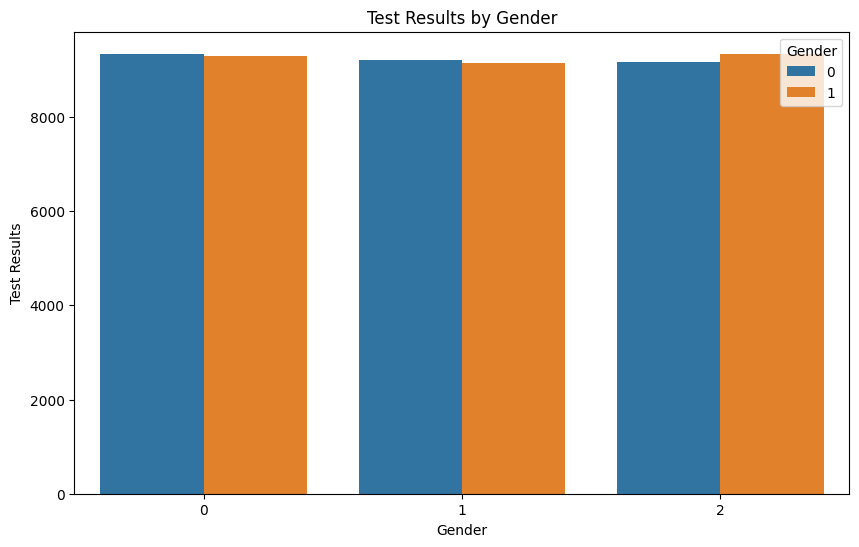

In [41]:
#8 Bar Plot of Test Results by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Test Results', hue='Gender', data=df)
plt.title('Test Results by Gender')
plt.xlabel('Gender')
plt.ylabel('Test Results')
plt.show()

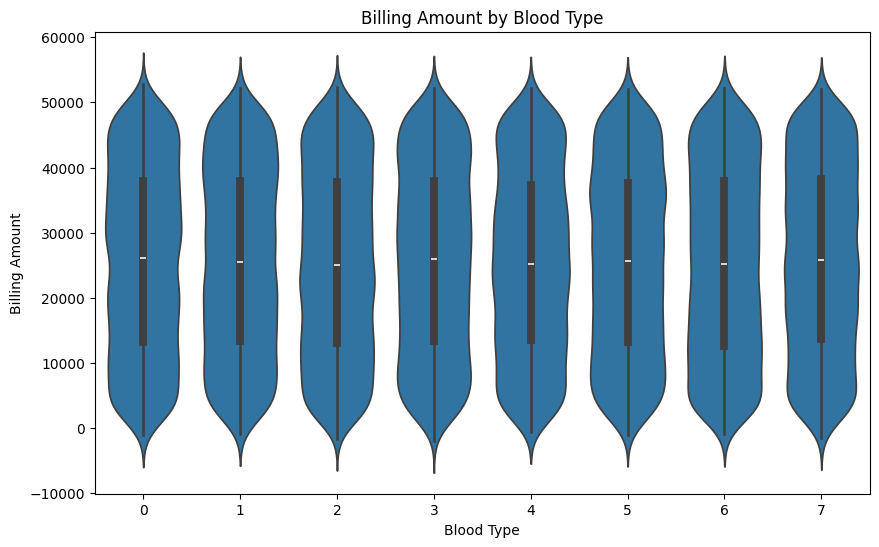

In [42]:
#9 Violin Plot of Billing Amount by Blood Type
plt.figure(figsize=(10, 6))
sns.violinplot(x='Blood Type', y='Billing Amount', data=df)
plt.title('Billing Amount by Blood Type')
plt.xlabel('Blood Type')
plt.ylabel('Billing Amount')
plt.show()